# Question: How are run times distributed?
We would like to know how run times are distributed for films in the `runtimes` table.

## Loading data
Below we load libraries and connect to the database. 

In [1]:
from moviesdb import moviesdb as mdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
db = mdb.MoviesDb()

In [3]:
db.list_column_names('runtimes')

['tconst', 'runtime_minutes']

In [4]:
query = """
SELECT runtime_minutes, COUNT(tconst) AS frequency
FROM runtimes
GROUP BY runtime_minutes
"""
df = db.load_query_as_df(query)

In [5]:
df = df.query('runtime_minutes < 240')

In [6]:
df_smoothed = df.rolling(on = 'runtime_minutes', window = 10).sum()

<Figure size 432x288 with 0 Axes>

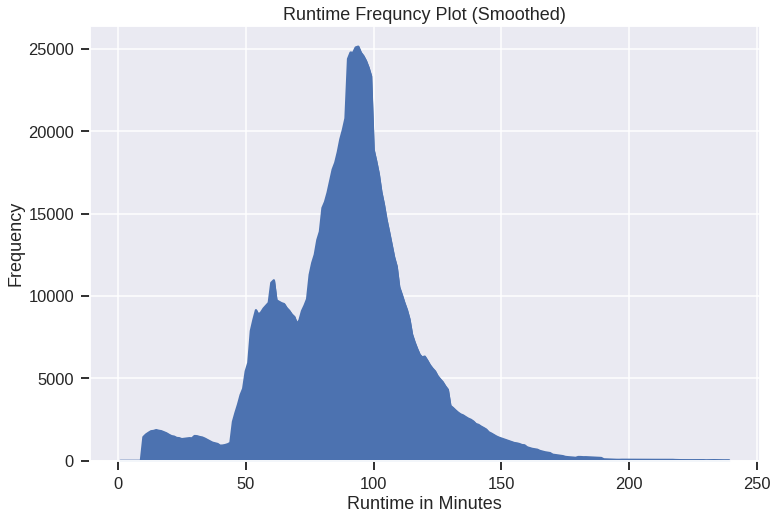

In [7]:
plt.figure()
plt.style.use('seaborn')
sns.set_context('talk')
df_smoothed.plot.area(x='runtime_minutes', 
                      y='frequency', 
                      figsize=(12,8),
                      xlabel = 'Runtime in Minutes', 
                      ylabel = 'Frequency', 
                      title = 'Runtime Frequncy Plot (Smoothed)',
                      legend = None
                     )
plt.savefig('../images/runtime_frequency_plot.png', bbox_inches='tight')

In [31]:
argmax = df_smoothed.loc[df_smoothed['frequency'].idxmax(),'runtime_minutes']
print(f'Frequency is maximized at runtime of {argmax} minutes.')

Frequency is maximized at runtime of 94 minutes.
